In [1]:
from srgan import SRGAN
from srgan import Generator
from config import config, log_config

In [2]:
LR = config.TRAIN.lr           
BATCH_SIZE = config.TRAIN.batch_size
EPOCHS =  config.TRAIN.n_epoch
LR_DECAY = config.TRAIN.lr_decay

In [ ]:
model = SRGAN(LR, BATCH_SIZE, EPOCHS, LR_DECAY)

In [ ]:
model.train() 

In [2]:
from data_loader import DataLoader

In [3]:
loader = DataLoader('val')
val_ds = loader.load_data(10) 

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
def build_generator(shape=(56,56,3)):
        img_lr = tf.keras.layers.Input(shape=shape)
        gen_hr = Generator(img_lr)
        return tf.keras.models.Model(img_lr, gen_hr)
    

In [6]:
gen_model = build_generator()

In [7]:
gen_model.load_weights("./training_checkpoints/epoch_40_g.h5") # loading saved weights

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

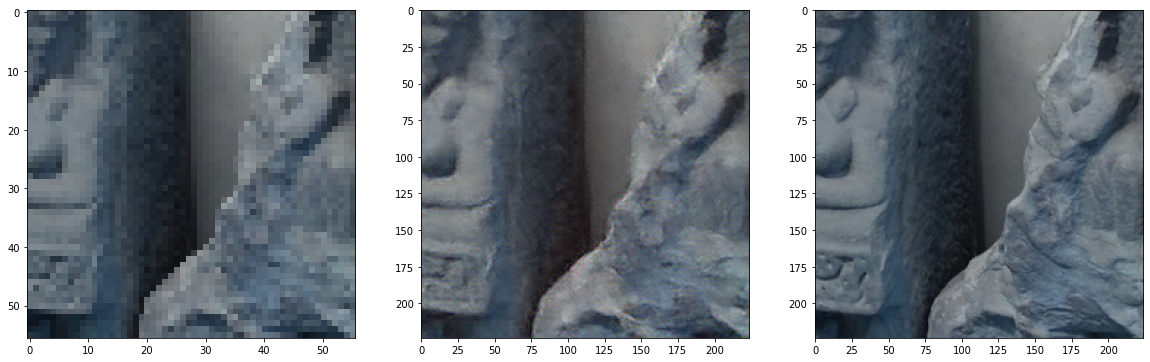

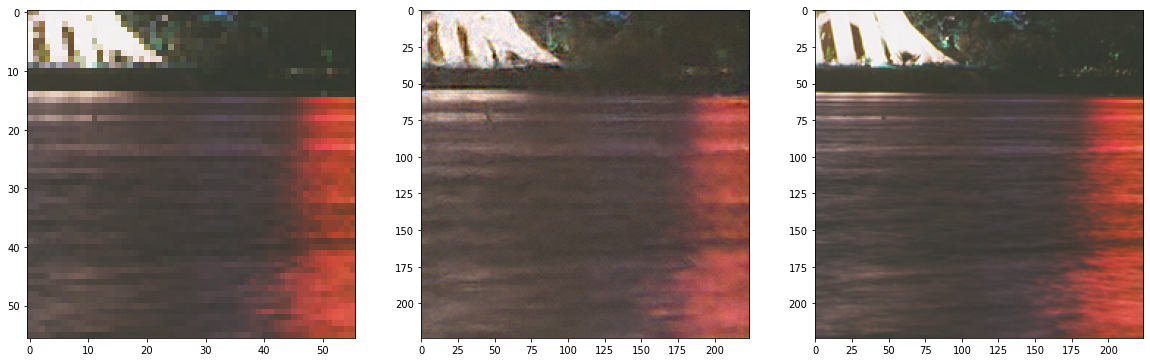

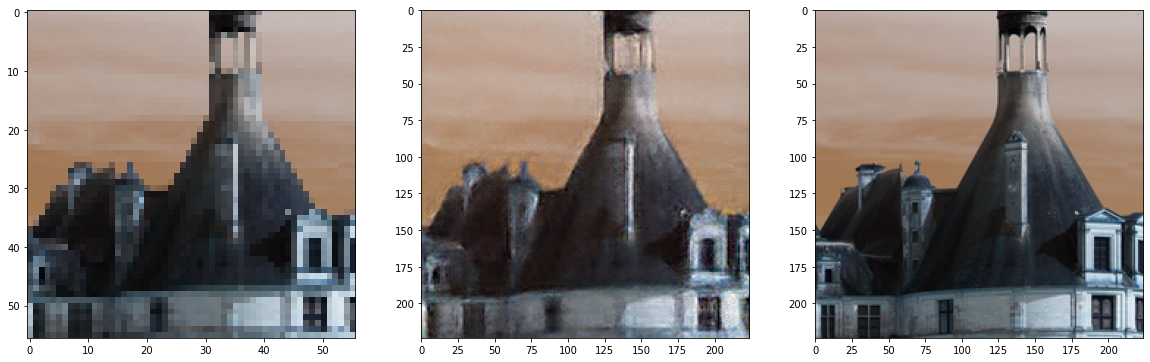

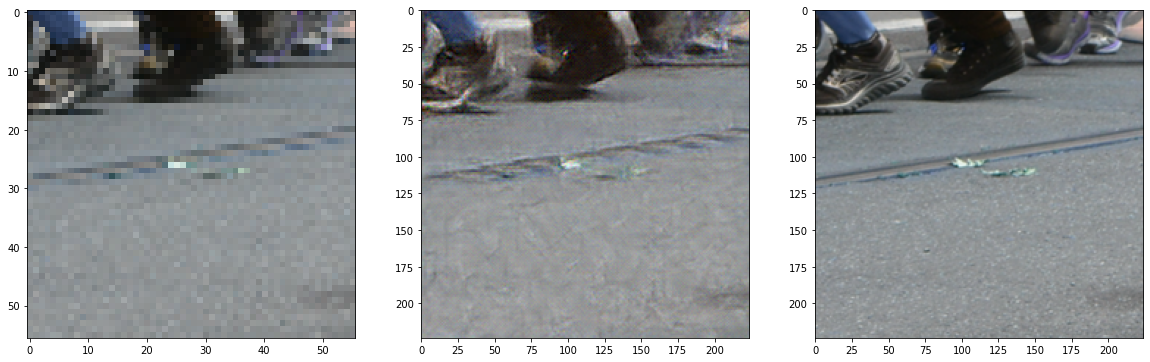

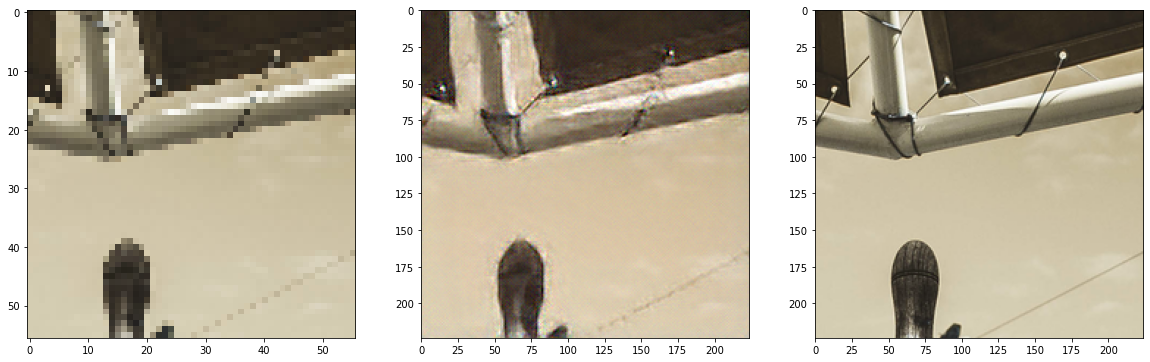

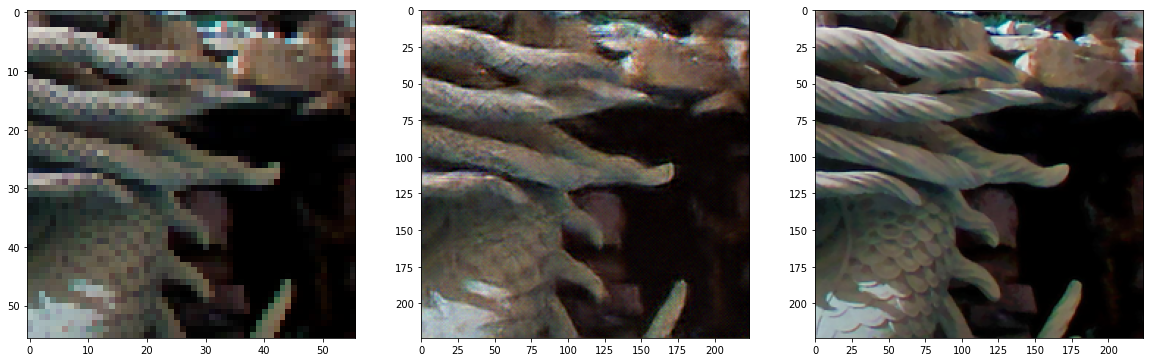

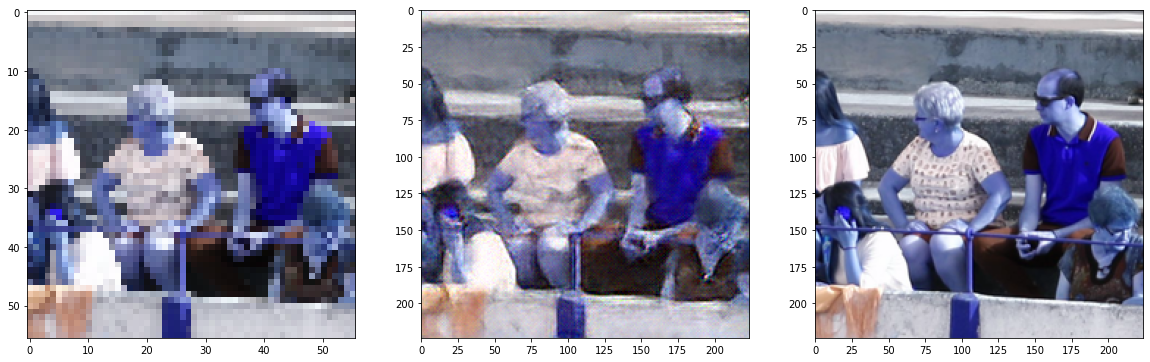

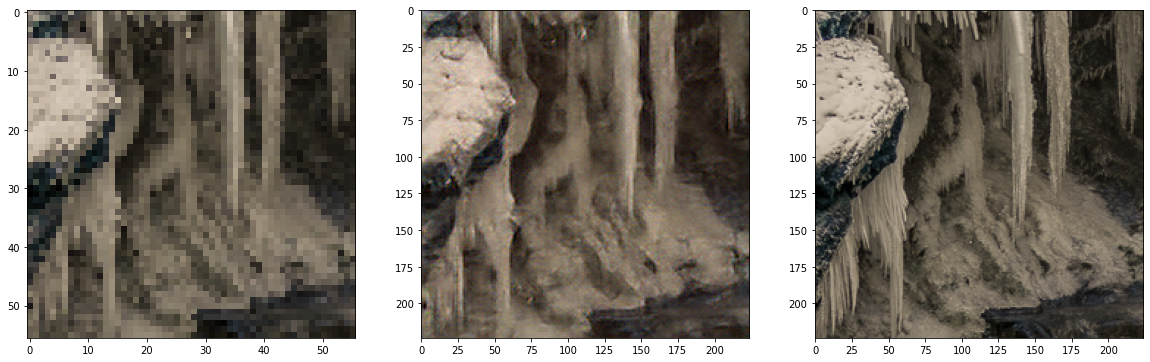

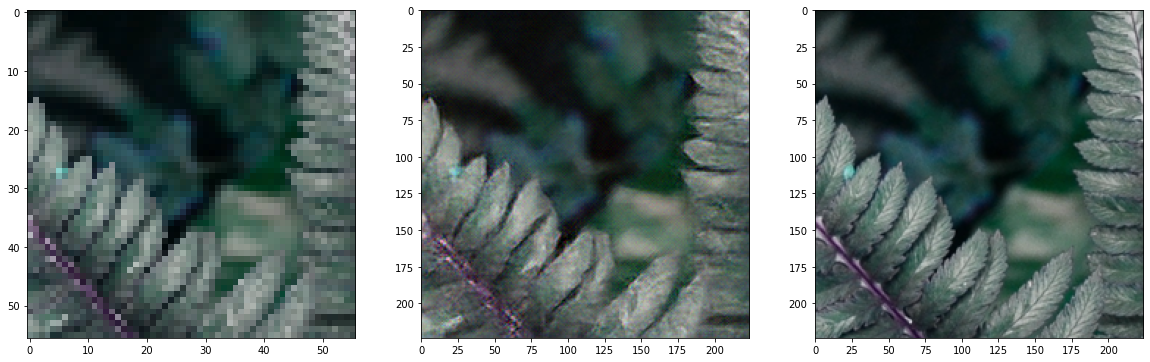

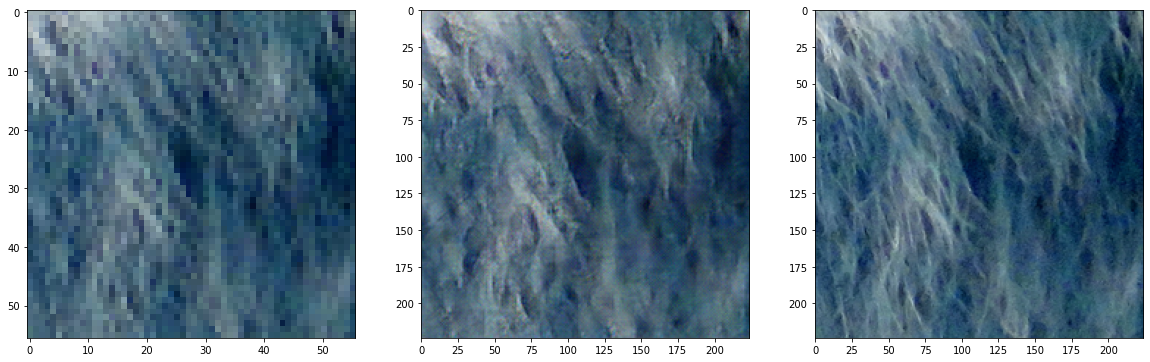

In [10]:
flag=0
#trying 10 samples from validation dataset
for val_imgs in tr_ds:
    gen_imgs = gen_model(val_imgs[0])
    for i in range(10):
        img_lr = (val_imgs[0][i]+1)/2
        img_hr = (val_imgs[1][i]+1)/2
        # print(img_hr)
        gen_img = (gen_imgs[i]+1)/2
        fig = plt.figure(figsize=(1,3))
        fig.set_figwidth(20)
        fig.set_figheight(20)
        plt.subplot(1,3,1)
        plt.imshow(img_lr)
        plt.subplot(1,3,3)
        plt.imshow(img_hr)
        plt.subplot(1,3,2)
        plt.imshow(gen_img)
        flag=1
    if flag==1:
        # print(gen_img.shape)
        break